In [2]:
import os
import pandas as pd

# Lecture dataset

In [31]:

dataset_name = "C:/Users/mayel/Documents/DEV/Projets/loto_generator/data/combined_cleaned_dataset.csv"
df = pd.read_csv(dataset_name, sep=';', encoding='utf-8')

# Conversion de la colonne 'date_de_tirage' en format datetime
df['date_de_tirage'] = pd.to_datetime(df['date_de_tirage'], format='%d/%m/%Y', errors='coerce')

# Trier par la colonne 'date_de_tirage'
df_sorted = df.sort_values(by='date_de_tirage')

# Réinitialiser l'index pour éviter le mélange d'index
df_sorted.reset_index(drop=True, inplace=True)

# Reformater la colonne 'date_de_tirage' pour qu'elle soit affichée en format 'jj/mm/aaaa'
df_sorted['date_de_tirage'] = df_sorted['date_de_tirage'].dt.strftime('%d/%m/%Y')

# Afficher le DataFrame trié et réindexé
df_sorted


,date_de_tirage,boule_1,boule_2,boule_3,boule_4,boule_5,etoile_1,etoile_2,boules_gagnantes_en_ordre_croissant,etoiles_gagnantes_en_ordre_croissant
0,13/02/2004,32,16,29,41,36,9,7,-16-29-32-36-41-,-7-9-
1,20/02/2004,13,50,47,7,39,2,5,-7-13-39-47-50-,-2-5-
2,27/02/2004,37,19,18,14,31,5,4,-14-18-19-31-37-,-4-5-
3,05/03/2004,39,37,4,7,33,5,1,-4-7-33-37-39-,-1-5-
4,12/03/2004,44,47,15,28,24,4,5,-15-24-28-44-47-,-4-5-
...,...,...,...,...,...,...,...,...,...,...
1770,13/09/2024,31,42,10,15,17,4,12,-10-15-17-31-42-,-4-12-
1771,17/09/2024,30,32,20,41,44,10,1,-20-30-32-41-44-,-1-10-
1772,20/09/2024,16,37,34,25,29,3,7,-16-25-29-34-37-,-3-7-
1773,24/09/2024,20,21,49,36,18,5,3,-18-20-21-36-49-,-3-5-


In [37]:
df1 = df['boules_gagnantes_en_ordre_croissant']
dict_values = {}
for index,values in df1.items():
    #print(index,values)
    list_values =values.split("-")
    for key in list_values:
        if key != "":
            dict_values[key] = dict_values.get(key, 0) + 1

dict_values = dict(sorted(dict_values.items(), key=lambda item: int(item[0])))
print(dict_values)

{'1': 170, '2': 168, '3': 174, '4': 178, '5': 181, '6': 173, '7': 183, '8': 161, '9': 168, '10': 191, '11': 180, '12': 181, '13': 179, '14': 180, '15': 186, '16': 179, '17': 193, '18': 159, '19': 198, '20': 189, '21': 198, '22': 141, '23': 202, '24': 176, '25': 185, '26': 190, '27': 187, '28': 173, '29': 189, '30': 177, '31': 169, '32': 168, '33': 152, '34': 181, '35': 184, '36': 167, '37': 190, '38': 187, '39': 174, '40': 162, '41': 154, '42': 195, '43': 164, '44': 200, '45': 183, '46': 153, '47': 159, '48': 173, '49': 176, '50': 195}


--------------------------

# Visualisation

C:\Users\mayel\AppData\Local\Temp\ipykernel_13980\2466804777.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=numeros, y=occurrences, palette='viridis')


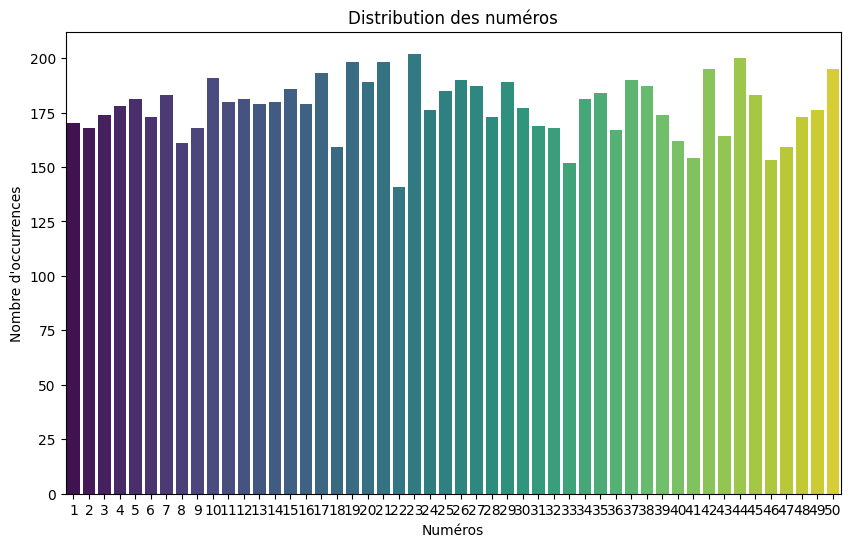

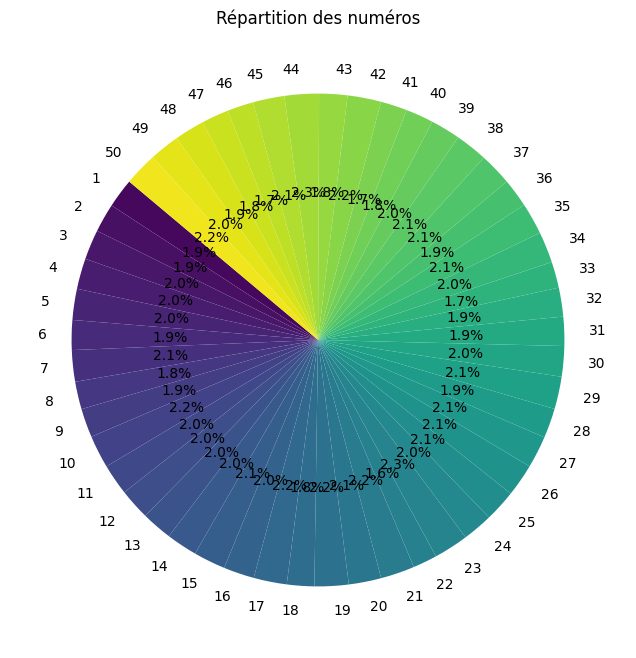

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Exemple de dictionnaire avec les numéros et leur nombre d'occurrences
numero_occurrences = dict_values

# Trier le dictionnaire par numéro (clé)
numero_occurrences = dict(sorted(numero_occurrences.items(), key=lambda item: int(item[0])))

# Récupérer les clés (numéros) et les valeurs (nombre d'occurrences)
numeros = list(numero_occurrences.keys())
occurrences = list(numero_occurrences.values())

# 1. Histogramme (barplot) de la distribution des numéros
plt.figure(figsize=(10, 6))
sns.barplot(x=numeros, y=occurrences, palette='viridis')
plt.title('Distribution des numéros')
plt.xlabel('Numéros')
plt.ylabel('Nombre d\'occurrences')
plt.show()

# 2. Diagramme circulaire (camembert) pour visualiser la distribution
plt.figure(figsize=(8, 8))
plt.pie(occurrences, labels=numeros, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(numeros)))
plt.title('Répartition des numéros')
plt.show()
